In [1]:
from pathlib import Path
import numpy as np
import pickle
import pandas as pd


In [2]:
import sys
sys.path.append('/home/<User>/repos/csg_is')

from py_dataset import sys_func
from py_dataset import feature_plotting

In [3]:
file_path = Path('/media/<User>/DC/IS_Data_Exploration_and_Feature_Engineering_for_an_IoT_Device_Behavior_Fingerprinting_Dataset/sys_system_calls_Heqing_device2/merged_data.npz')
assert file_path.exists(), 'Data not found'

In [4]:
with np.load(file_path, allow_pickle=True) as npz:
    print(npz.files)
    X = npz['arr_0']
print(X.shape)

vectorizer = sys_func.create_CountVectorizer()
cols = vectorizer.get_feature_names_out()
cols = np.append(cols, [['timestamp'], ['label']])
print (cols.shape)
df = pd.DataFrame(X, columns=cols)

label_encoder = sys_func.create_label_encoder_for_labels()
df['label'] = label_encoder.inverse_transform(df['label'].values.astype(int))

['arr_0']
(11428, 162)
Loaded set: ('accept', 'accept4', 'access', 'add_key', 'adjtimex', 'bind', 'brk', 'capget', 'capset', 'chdir', 'chmod', 'chown32', 'clock_gettime', 'clone', 'close', 'connect', 'dup', 'dup2', 'dup3', 'epoll_create1', 'epoll_ctl', 'epoll_wait', 'eventfd2', 'execve', 'exit', 'exit_group', 'faccessat', 'fadvise64_64', 'fallocate', 'fchdir', 'fchmod', 'fchmodat', 'fchown32', 'fcntl64', 'fgetxattr', 'flistxattr', 'flock', 'fsetxattr', 'fstat64', 'fstatat64', 'fstatfs64', 'fsync', 'ftruncate64', 'futex', 'getcwd', 'getdents64', 'getegid32', 'geteuid32', 'getgid32', 'getgroups32', 'getpeername', 'getpgid', 'getpgrp', 'getpid', 'getppid', 'getpriority', 'getrandom', 'getresgid32', 'getresuid32', 'getsid', 'getsockname', 'getsockopt', 'gettid', 'gettimeofday', 'getuid32', 'getxattr', 'inotify_add_watch', 'ioctl', 'ioprio_get', 'ioprio_set', 'kcmp', 'keyctl', 'kill', 'lchown32', 'lgetxattr', 'llseek', 'lseek', 'lstat64', 'madvise', 'mkdir', 'mknod', 'mmap2', 'mount', 'mpro

In [5]:
df.head(1)

,accept,accept4,access,add_key,adjtimex,bind,brk,capget,capset,chdir,...,uname,unlink,unlinkat,utimensat,wait4,waitid,write,writev,timestamp,label
0,0.0,0.000017,0.001,0.0,0.0,0.000003,0.001033,0.00005,0.00002,0.000004,...,0.000261,0.000014,0.000008,0.0,0.000495,0.000015,0.029428,0.000004,1.699708e+09,6_beurk


#### Plots

In [6]:
vectors = df.iloc[:, :-2]
vectors_scaled = feature_plotting.minmax_scale_features(vectors,
                                                        remove_outliers_iqr_all_columns=False,
                                                        cols_to_exclude_from_scaling=[])

df_scaled = vectors_scaled.copy()
df_scaled['label'] = df['label']
df_scaled['timestamp'] = df['timestamp']

In [11]:
from sklearn.feature_selection import mutual_info_classif

result = list(zip(vectors_scaled.columns, mutual_info_classif(vectors_scaled, df_scaled["label"])))
result

[('accept', 0.019749434774496866),
 ('accept4', 0.8212032101731932),
 ('access', 0.8651950461703564),
 ('add_key', 0.006470767782738918),
 ('adjtimex', 0.0023526286765456206),
 ('bind', 0.3020021915728104),
 ('brk', 0.8482820283276045),
 ('capget', 0.5206980885966623),
 ('capset', 0.5006837575212479),
 ('chdir', 0.8289501594558129),
 ('chmod', 0.0),
 ('chown32', 0.31396848926201715),
 ('clock_gettime', 0.43532703393650607),
 ('clone', 0.9186862078992464),
 ('close', 0.6772589512295211),
 ('connect', 0.597994360695377),
 ('dup', 0.9725742590831468),
 ('dup2', 0.5711242838574524),
 ('dup3', 0.9514057479123457),
 ('epoll_create1', 0.09081436955854372),
 ('epoll_ctl', 0.6427928085622252),
 ('epoll_wait', 0.6304184550666836),
 ('eventfd2', 0.087838520057542),
 ('execve', 0.5709874764718803),
 ('exit', 0.2853226556678914),
 ('exit_group', 0.6031421069472827),
 ('faccessat', 0.74352699073803),
 ('fadvise64_64', 0.6256787033789522),
 ('fallocate', 0.0020369747844823927),
 ('fchdir', 0.01521201

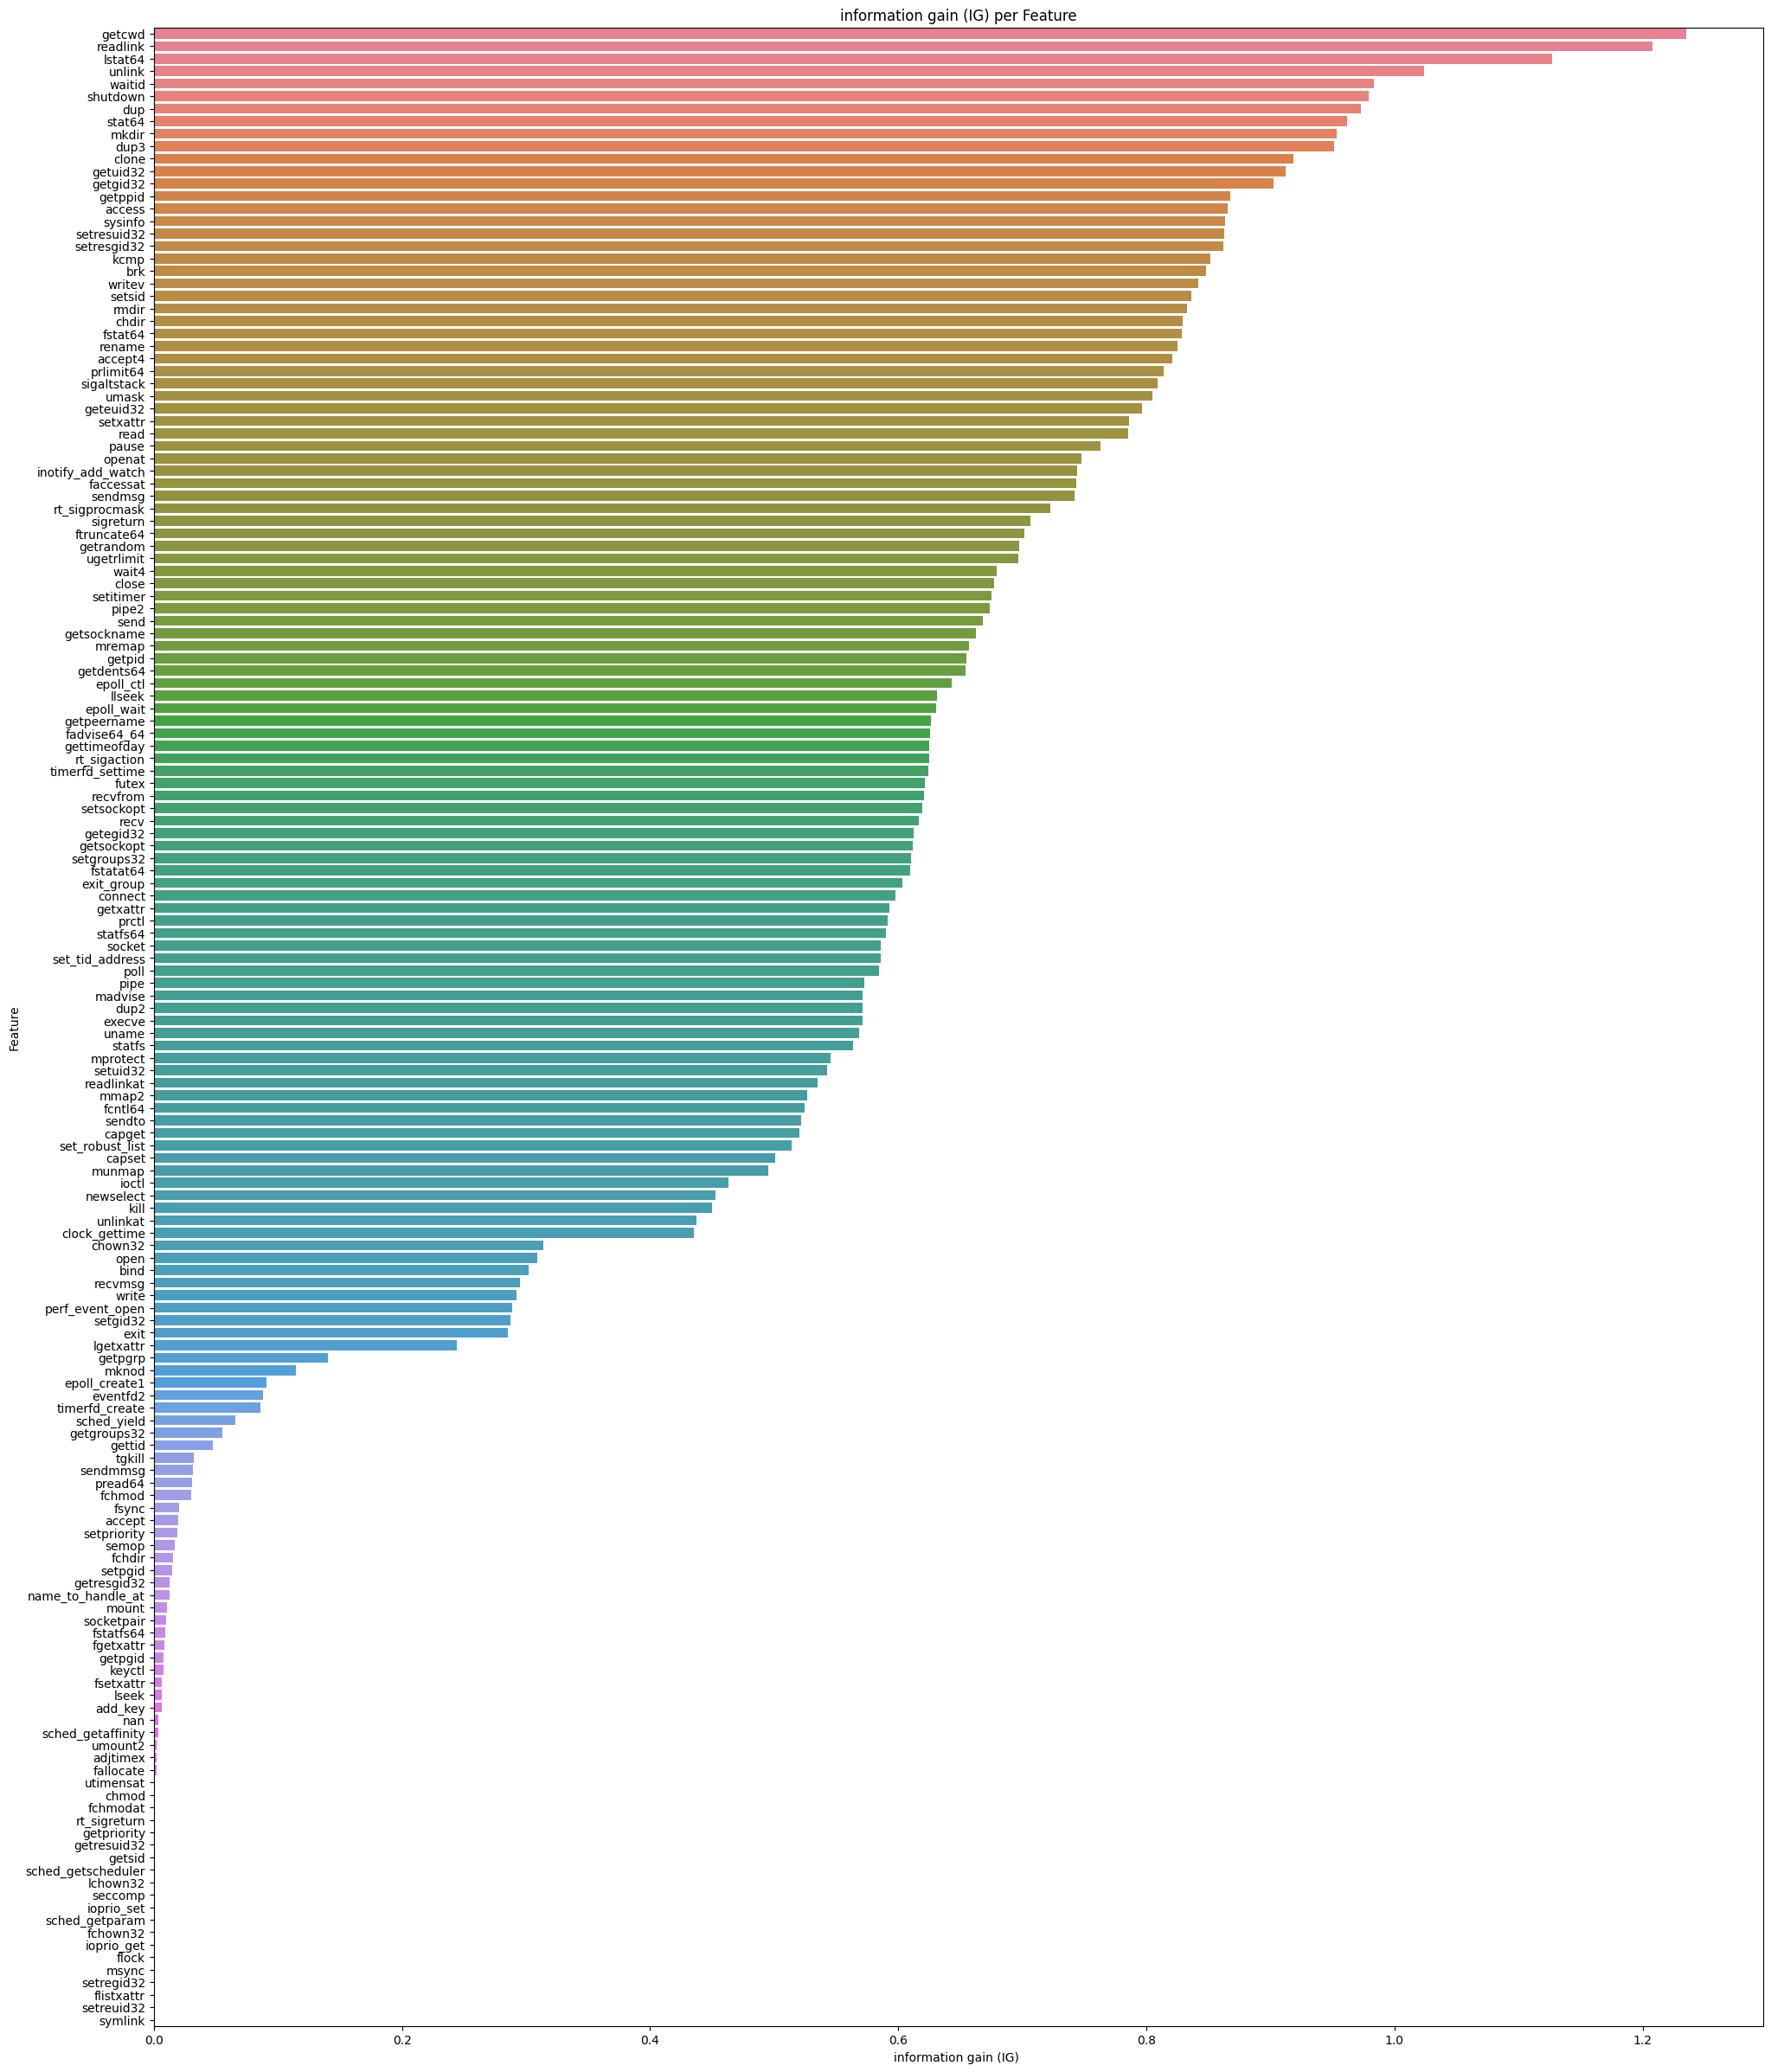

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.DataFrame(result, columns=["Feature", "IG"])
data_df = data_df.sort_values(by="IG", ascending=False)
plt.figure(figsize=(24, 30))
sns.barplot(data=data_df, native_scale=True, orient="h", hue="Feature", x="IG", y="Feature")

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('information gain (IG) ')

plt.title('information gain (IG) per Feature')
plt.show()

##### Split into labels

### Testing PCA

In [17]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:, :-2])
print(pca.explained_variance_ratio_.sum())
X_pca.shape

0.9805749462367634


(11428, 2)

In [19]:
X_pca = np.column_stack((X_pca, X[:, -2:]))
X_pca.shape

(11428, 4)

In [20]:
df_pca = pd.DataFrame(X_pca, columns=['pca1','pca2', 'timestamp', 'label'])

label_encoder = sys_func.create_label_encoder_for_labels()
df_pca['label'] = label_encoder.inverse_transform(df_pca['label'].values.astype(int))

In [25]:
merged_df = pd.concat([vectors_scaled, df_pca], axis=1).drop("timestamp", axis=1).drop("label", axis=1)
merged_df.head(1)

,accept,accept4,access,add_key,adjtimex,bind,brk,capget,capset,chdir,...,uname,unlink,unlinkat,utimensat,wait4,waitid,write,writev,pca1,pca2
0,0.0,0.01734,0.018301,0.0,0.0,0.003827,0.03753,0.053132,0.05408,0.009567,...,0.037461,0.011108,0.021582,0.0,0.035093,0.007703,0.144997,0.016401,-0.107342,-0.020463


In [26]:
from sklearn.feature_selection import mutual_info_classif

result = list(zip(merged_df.columns, mutual_info_classif(merged_df, df_pca["label"])))
result

[('accept', 0.015806401563474903),
 ('accept4', 0.8212032101731932),
 ('access', 0.8651950461703564),
 ('add_key', 0.0),
 ('adjtimex', 0.004473615058892211),
 ('bind', 0.3071879698139304),
 ('brk', 0.8482820283276045),
 ('capget', 0.5206397523465167),
 ('capset', 0.4978311192098239),
 ('chdir', 0.8316323909507863),
 ('chmod', 0.005230933865327803),
 ('chown32', 0.32131947829084595),
 ('clock_gettime', 0.43532703393650607),
 ('clone', 0.9186862078992464),
 ('close', 0.6772589512295211),
 ('connect', 0.597994360695377),
 ('dup', 0.9742666915882681),
 ('dup2', 0.5711242838574524),
 ('dup3', 0.9533755732891054),
 ('epoll_create1', 0.10461210748048932),
 ('epoll_ctl', 0.6427928085622252),
 ('epoll_wait', 0.6304184550666836),
 ('eventfd2', 0.09009405422779393),
 ('execve', 0.5709874764718803),
 ('exit', 0.3029893425439729),
 ('exit_group', 0.6031421069472827),
 ('faccessat', 0.7433569444910311),
 ('fadvise64_64', 0.6285135396748829),
 ('fallocate', 0.0),
 ('fchdir', 0.0),
 ('fchmod', 0.03148

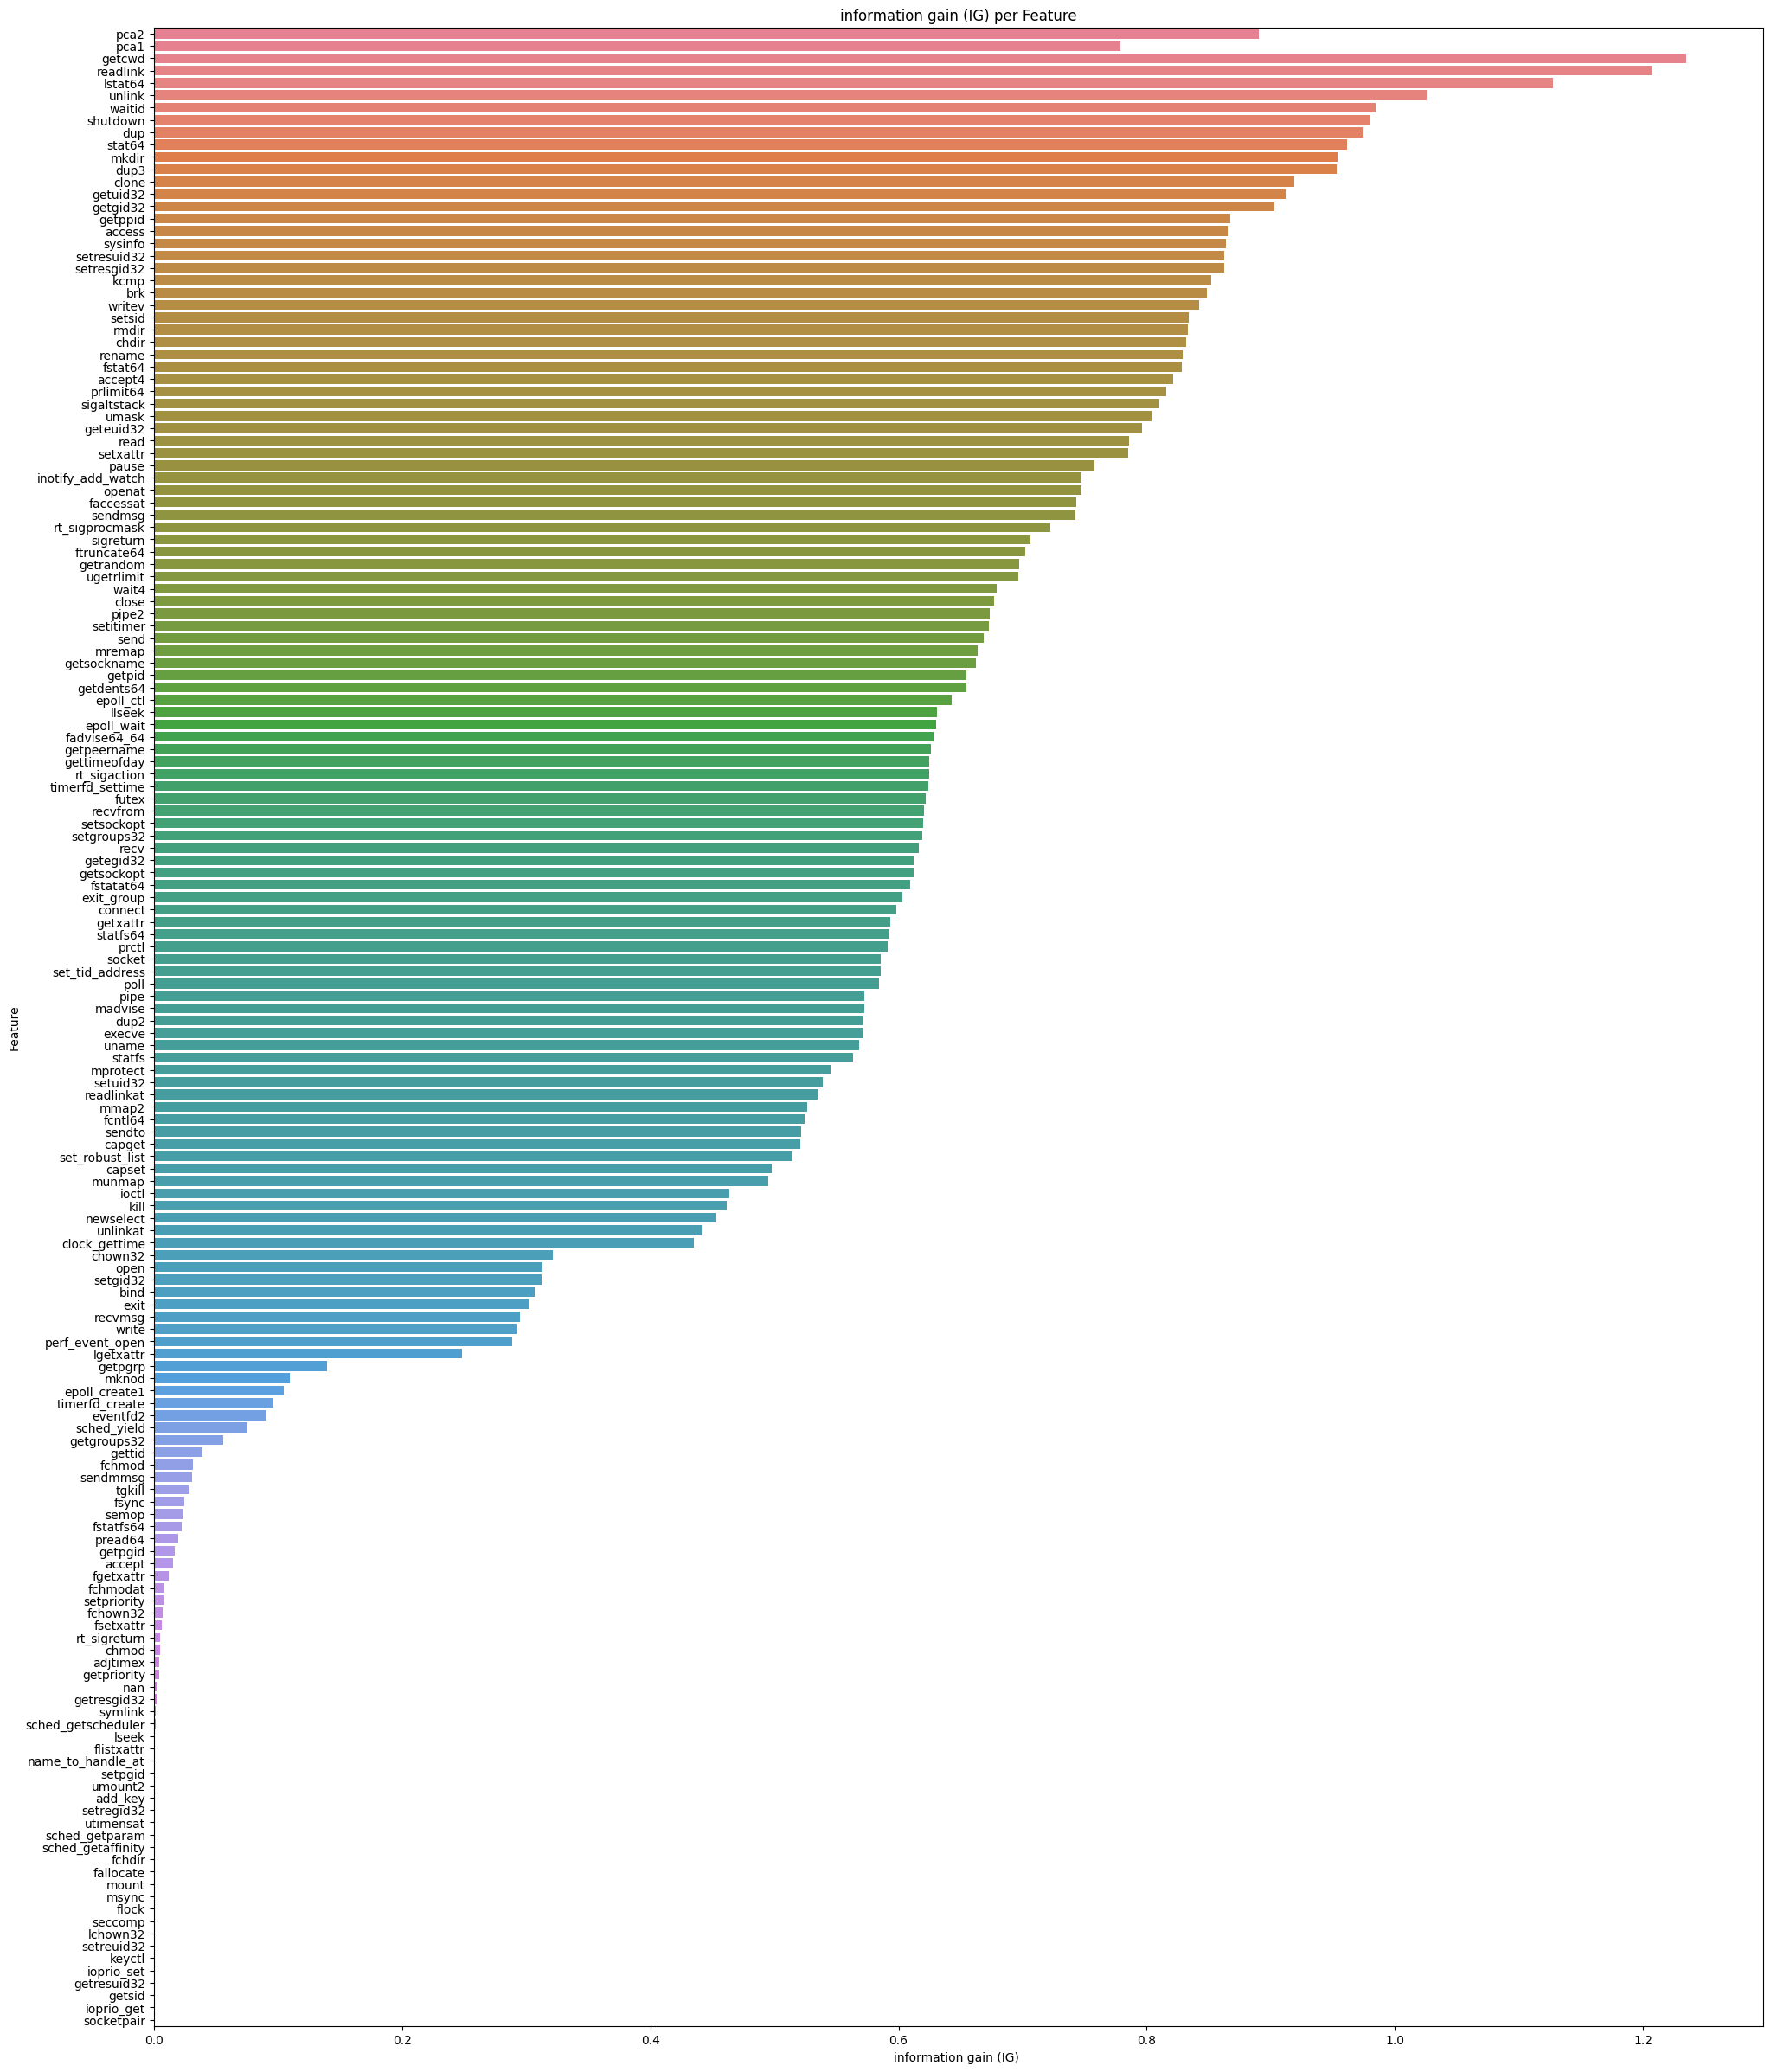

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.DataFrame(result, columns=["Feature", "IG"])
data_df = data_df.sort_values(by="IG", ascending=False)

first_df = data_df[(data_df["Feature"]=="pca1") | (data_df["Feature"]=="pca2")]
data_df = data_df[~((data_df["Feature"]=="pca1") | (data_df["Feature"]=="pca2"))]

data_df = pd.concat([first_df, data_df], axis=0)

plt.figure(figsize=(24, 30))
sns.barplot(data=data_df, native_scale=True, orient="h", hue="Feature", x="IG", y="Feature")

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('information gain (IG) ')

plt.title('information gain (IG) per Feature')
plt.show()